In [21]:
import utils
import importlib
importlib.reload(utils)

utils.say_hello()

Hello


# Summary Stats
`Math 321 stats is a good class for CS majors`  

Recall: We said that instances are sampled from the "universe of instances"  
In stats... we sau that a dataset is a sample from the population ("universe of instances") 
* dataset = sample
* universe = population

Example
* Sample: The number of emails CPSC222 students receive in October 2021
* Population: The number of emails ALL students nation-wide (or world-wide) receive in October 2021

More Key stats terms:
* Parameter: Any measurable characteristic of a population
    * e.g. population mean $\mu$
* Statistic: Any measurable characteristic of a sample
    * e.g. sample mean $\overline{x}$
* Descriptive stats: Organizing, summarizing, and presenting data in an informative way
    * e.g. central tendency measures, charting, ...
* Inferential stats: Making inferences that go beyond known data
    * e.g. infer something about a population based on a sample
    * e.g. hypothesis testing, prediction with linear regression, machine learning, ...
    * e.g. interpolating data (this is an example we did)

## Summary Stats
A summary stat summarizes data into a single value or set of values

Number of instances

In [22]:
import pandas as pd
x = [8,5,4,9,8,6]
ser = pd.Series(x)
print(ser)
print("Number of instances:", len(ser)) # can also do ser.shape

0    8
1    5
2    4
3    9
4    8
5    6
dtype: int64
Number of instances: 6


Min and max
* Doe'snt make sense for nominal attributes

In [23]:
print("min:",ser.min(),"max:",ser.max())

min: 4 max: 9


## Central Tendency
Central tendency represents the middle value(s) of a data distribution

Mid Value: $\frac{min+max}{2}$

In [24]:
print("mid value:",(ser.min()+ser.max())/2)

mid value: 6.5


Arithmetic mean (AKA average)
* sensitive to outliers
* should only be applied if you know your data is numeric

In [25]:
print("mean",ser.mean())

mean 6.666666666666667


Median: middle value in a list of sorted values
* If the number of instances is even, then take the midpoint between the two middle numbers

In [26]:
print(ser.sort_values())

2    4
1    5
5    6
0    8
4    8
3    9
dtype: int64


Mode: The most frequent value(s)

In [27]:
print(ser.mode())


0    8
dtype: int64


In [28]:
x = [8,5,4,9,8,6,9]
ser2 = pd.Series(x)
print(ser2)
print(ser.mode())
print(ser2.mode())

0    8
1    5
2    4
3    9
4    8
5    6
6    9
dtype: int64
0    8
dtype: int64
0    8
1    9
dtype: int64


## Data Dispersion (Spread)
Range: max - min

In [29]:
print("range:",ser.max()-ser.min())

range: 5


Quantiles: Roughly equal size of partitions of the data (in sorted order)
* 2 quantiles: 1 data point that divides the dataset into 2 halves (AKA median)
* quartiles: 3 data points that divide the dataset into quarters 
* percentiles: 99 data points that divide the dataset into 100 groups
    * 25th percentile: first quartile
    * 50th percentile: second quartile (AKA median)
    * 75th percentile: third quartile
* IQR (interquartile range): 75th percentile - 25th percentile

In [30]:
print(ser.sort_values())
print("25th percentile:", ser.quantile([0.25]))

2    4
1    5
5    6
0    8
4    8
3    9
dtype: int64
25th percentile: 0.25    5.25
dtype: float64


In [31]:
print(ser2.sort_values())
print("25th percentile:", ser2.quantile([0.25]))

2    4
1    5
5    6
0    8
4    8
3    9
6    9
dtype: int64
25th percentile: 0.25    5.5
dtype: float64


In [32]:
# Lets say we need an actual point in our dataset
sorted_ser2 = ser2.sort_values()
index = round(0.25 * len(sorted_ser2)) # would be a float so we use round
print("25th percentile:", sorted_ser2.iloc[index])

25th percentile: 6


## Box Plots
These are great visualizations of the spread of data
* Take advantage of quantiles!
* Non-parametric

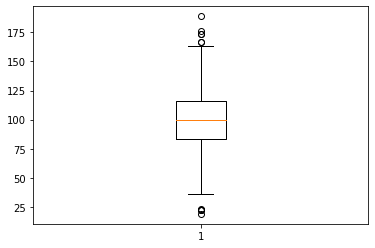

In [33]:
import matplotlib.pyplot as plt
import numpy as np

mean = 100
stdev = 25
num_samples = 1000
x1 = np.random.normal(mean, stdev, num_samples)
stdev = 5
num_samples = 500
x2 = np.random.normal(mean, stdev, num_samples)

# The orange vertical line in the box is the median
# The box around the median is the IQR
# The lines (whiskers) are the [Q3 or Q1] +/- 1.5 * IQR
# The circles outside the whiskers are outliers

plt.boxplot(x1)
plt.show()

Variance: Spread of the mean
* High variance: data is more spread out from the mean
* Low variance: data is more clustered around the mean

Standard deviation: square root of variance
* More commonly used... it is in the same units as the mean

In [34]:
print("variance:",ser.var())
print("standard deviation:",ser.std())
print("another way to get the standard deviation:", np.sqrt(ser.var()))

variance: 3.866666666666667
standard deviation: 1.9663841605003503
another way to get the standard deviation: 1.9663841605003503


# Histogram Demo

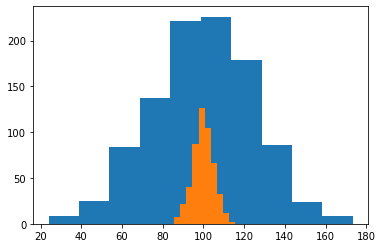

In [35]:
import matplotlib.pyplot as plt
import numpy as np

mean = 100
stdev = 25
num_samples = 1000
x1 = np.random.normal(mean, stdev, num_samples)
stdev = 5
num_samples = 500
x2 = np.random.normal(mean, stdev, num_samples)

# The orange vertical line in the box is the median
# The box around the median is the IQR
# The lines (whiskers) are the [Q3 or Q1] +/- 1.5 * IQR
# The circles outside the whiskers are outliers

plt.figure()
plt.hist(x1, label="$\sigma=25$")
plt.hist(x2, label="$\sigma=5$") # This is smaller because the num of samples is lower
plt.show()

## Empirical Rule for Normal Distributions
* If your data is "normal" (roughly follows a bell shape curve):
    * (about) 68% is within mean +/- 1 standard deviation
    * (about) 95% is within mean +/- 2 standard deviation
    * (about) 99.7% is within mean +/- 3 standard deviation
    
Let's "prove" this for our sample x1 data

In [36]:
count_within_1stdev = 0
count_within_2nddev = 0
count_within_3rddev = 0


mean_sampled = np.mean(x1)
print(mean_sampled)
std_sampled = np.std(x1)
print(std_sampled)

for value in x1:
    if mean_sampled - std_sampled <= value <= mean_sampled + std_sampled:
        count_within_1stdev += 1
    if (mean_sampled - std_sampled) * 2 <= value <= (mean_sampled + std_sampled) * 2:
        count_within_2nddev += 1
    if (mean_sampled - std_sampled) * 3 <= value <= (mean_sampled + std_sampled) * 3:
        count_within_3rddev += 1

print("within +/= 1 std:", count_within_1stdev / num_samples * 100)
print("within +/= 2 std:", count_within_2nddev / num_samples * 100)
print("within +/= 3 std:", count_within_3rddev / num_samples * 100)
    

99.64515363424411
24.81257592912682
within +/= 1 std: 136.8
within +/= 2 std: 4.2
within +/= 3 std: 0.0
